In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
url = "https://donnees.montreal.ca/fr/dataset/cd722e22-376b-4b89-9bc2-7c7ab317ef6b/resource/05deae93-d9fc-4acb-9779-e0942b5e962f/download/collisions_routieres.csv"
df = pd.read_csv(url)

In [ ]:
#mount data from drive
import os
from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/My Drive/'
dataset_path = 'Dataset/'
data_path = os.path.join(base_path, dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_data = os.path.join(data_path, 'collisions_routieres.csv')

In [ ]:
df = pd.read_csv(file_data)
df.head()

,NO_SEQ_COLL,JR_SEMN_ACCDN,DT_ACCDN,CD_MUNCP,NO_CIVIQ_ACCDN,SFX_NO_CIVIQ_ACCDN,BORNE_KM_ACCDN,RUE_ACCDN,TP_REPRR_ACCDN,ACCDN_PRES_DE,...,NB_VICTIMES_VELO,VITESSE_AUTOR,LOC_X,LOC_Y,LOC_COTE_QD,LOC_COTE_PD,LOC_DETACHEE,LOC_IMPRECISION,LOC_LONG,LOC_LAT
0,SPVM _ 2012 _ 1,ME,2012/02/01,66102.0,3501.0,NaN,NaN,ST CHARLES,2.0,STAT,...,0,NaN,276517.37950,5.035127e+06,A,3,O,N,-73.861616,45.455505
1,SPVM _ 2012 _ 10,MA,2012/01/03,66023.0,NaN,NaN,NaN,TERR VILLE DE MTL,NaN,NaN,...,0,NaN,275209.46185,5.038619e+06,B,4,N,N,-73.878549,45.486871
2,SPVM _ 2012 _ 100,VE,2012/02/24,66023.0,NaN,NaN,NaN,JACQUES BIZARD,1.0,CHERRIER,...,0,50.0,275759.07900,5.039027e+06,A,1,N,O,-73.871542,45.490564
3,SPVM _ 2012 _ 1000,JE,2012/10/11,66142.0,11800.0,NaN,NaN,BD SALABERRY,NaN,NaN,...,0,NaN,280970.09315,5.038348e+06,A,1,O,N,-73.804841,45.484648
4,SPVM _ 2012 _ 10000,DI,2012/04/22,66023.0,38.0,NaN,NaN,PL DU COMMERCE,NaN,NaN,...,0,NaN,301391.47638,5.036357e+06,A,1,O,N,-73.543590,45.467136


In [ ]:
# 1. Dataset Structure Summary
print("--- Dataset Structure ---")
print(df.info())


--- Dataset Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218272 entries, 0 to 218271
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NO_SEQ_COLL                  218272 non-null  object 
 1   JR_SEMN_ACCDN                218272 non-null  object 
 2   DT_ACCDN                     218272 non-null  object 
 3   CD_MUNCP                     218265 non-null  float64
 4   NO_CIVIQ_ACCDN               93491 non-null   float64
 5   SFX_NO_CIVIQ_ACCDN           444 non-null     object 
 6   BORNE_KM_ACCDN               111 non-null     float64
 7   RUE_ACCDN                    205974 non-null  object 
 8   TP_REPRR_ACCDN               135965 non-null  float64
 9   ACCDN_PRES_DE                147189 non-null  object 
 10  NB_METRE_DIST_ACCD           60692 non-null   float64
 11  CD_GENRE_ACCDN               208205 non-null  float64
 12  CD_SIT_PRTCE_ACCDN           519

In [ ]:

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now, when you display your DataFrame, it will not be truncated
# print(df)

In [ ]:
# Per variable
missing_per_variable = df.isnull().sum()
missing_percentage_per_variable = (df.isnull().sum() / len(df)) * 100
print("Missing values per variable:\n", missing_per_variable)
print("\nPercentage of missing values per variable:\n", missing_percentage_per_variable)

# Overall
total_missing = df.isnull().sum().sum()
total_cells = df.size
overall_missing_percentage = (total_missing / total_cells) * 100
print(f"\nOverall percentage of missing data: {overall_missing_percentage:.2f}%")

Missing values per variable:
 NO_SEQ_COLL                         0
JR_SEMN_ACCDN                       0
DT_ACCDN                            0
CD_MUNCP                            7
NO_CIVIQ_ACCDN                 124781
SFX_NO_CIVIQ_ACCDN             217828
BORNE_KM_ACCDN                 218161
RUE_ACCDN                       12298
TP_REPRR_ACCDN                  82307
ACCDN_PRES_DE                   71083
NB_METRE_DIST_ACCD             157580
CD_GENRE_ACCDN                  10067
CD_SIT_PRTCE_ACCDN             213077
CD_ETAT_SURFC                   12760
CD_ECLRM                        12919
CD_ENVRN_ACCDN                   7055
NO_ROUTE                       217550
CD_CATEG_ROUTE                   6355
CD_ETAT_CHASS                  165001
CD_ASPCT_ROUTE                   9917
CD_LOCLN_ACCDN                  17763
CD_POSI_ACCDN                  169056
CD_CONFG_ROUTE                  21972
CD_ZON_TRAVX_ROUTR             213368
CD_PNT_CDRNL_ROUTE             217882
CD_PNT_CDRNL_REPRR  

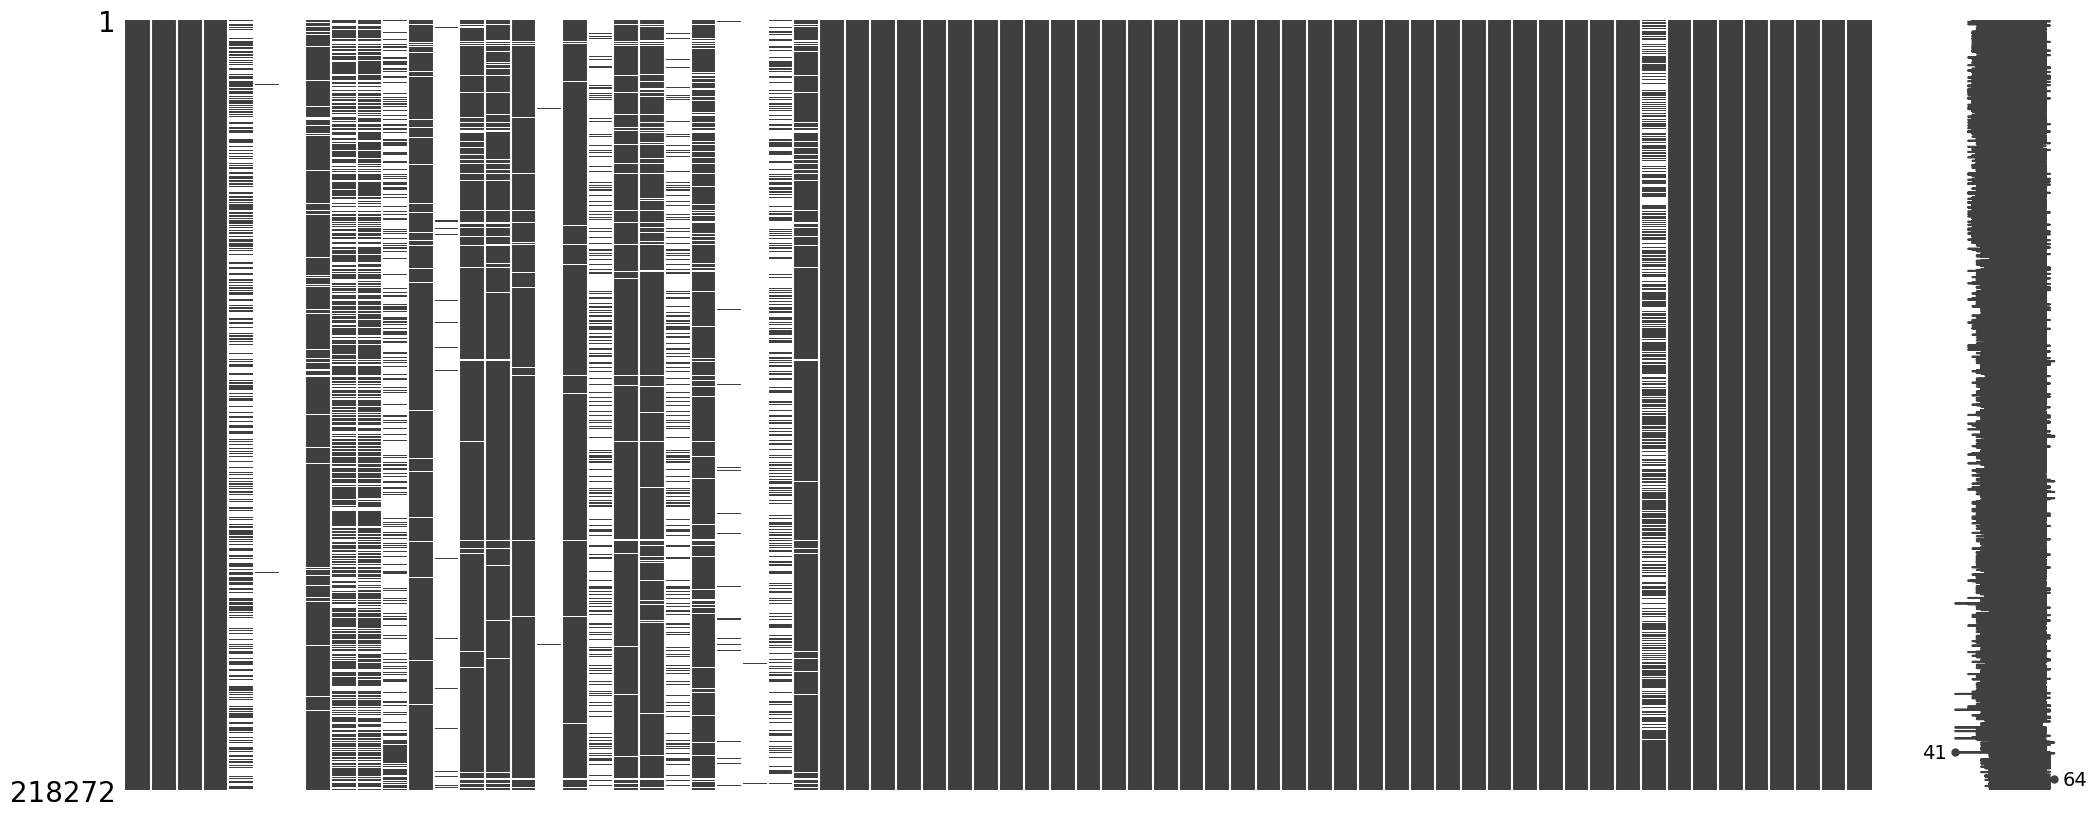

In [ ]:
# Using missingno (a specialized library for visualizing missing data)
import missingno as msno

msno.matrix(df)
plt.show()

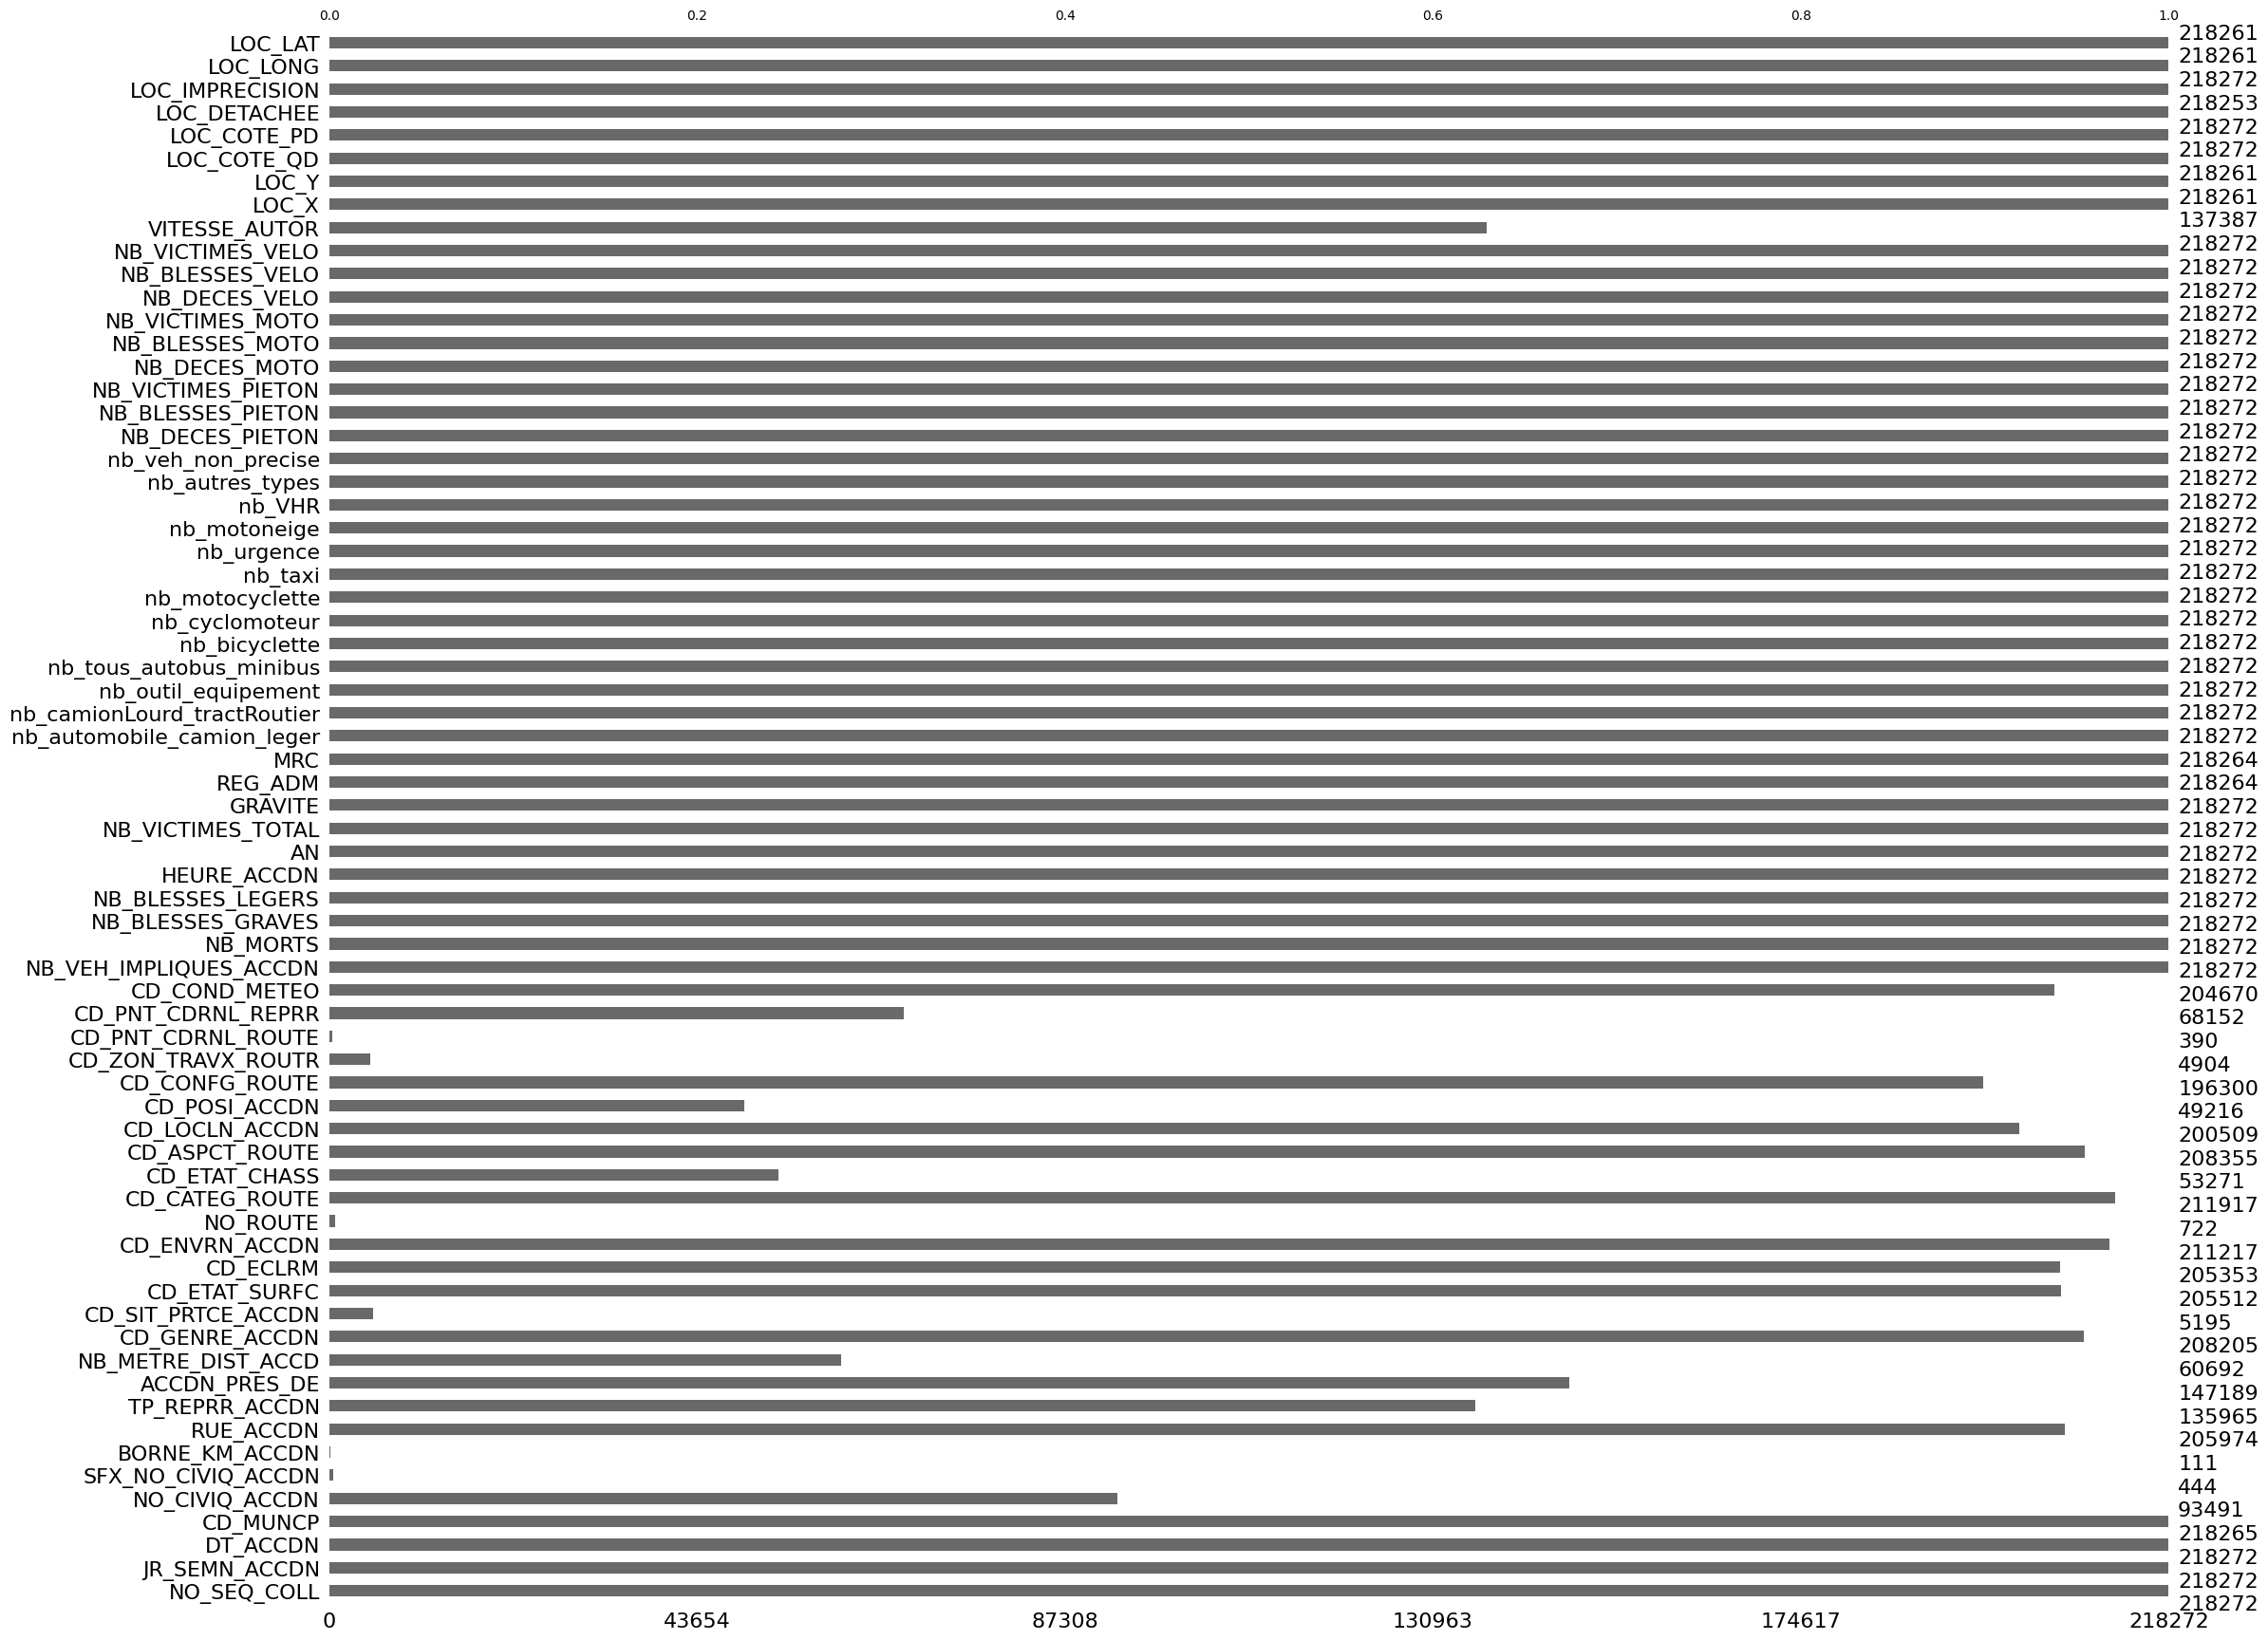

In [ ]:

msno.bar(df)
plt.show()

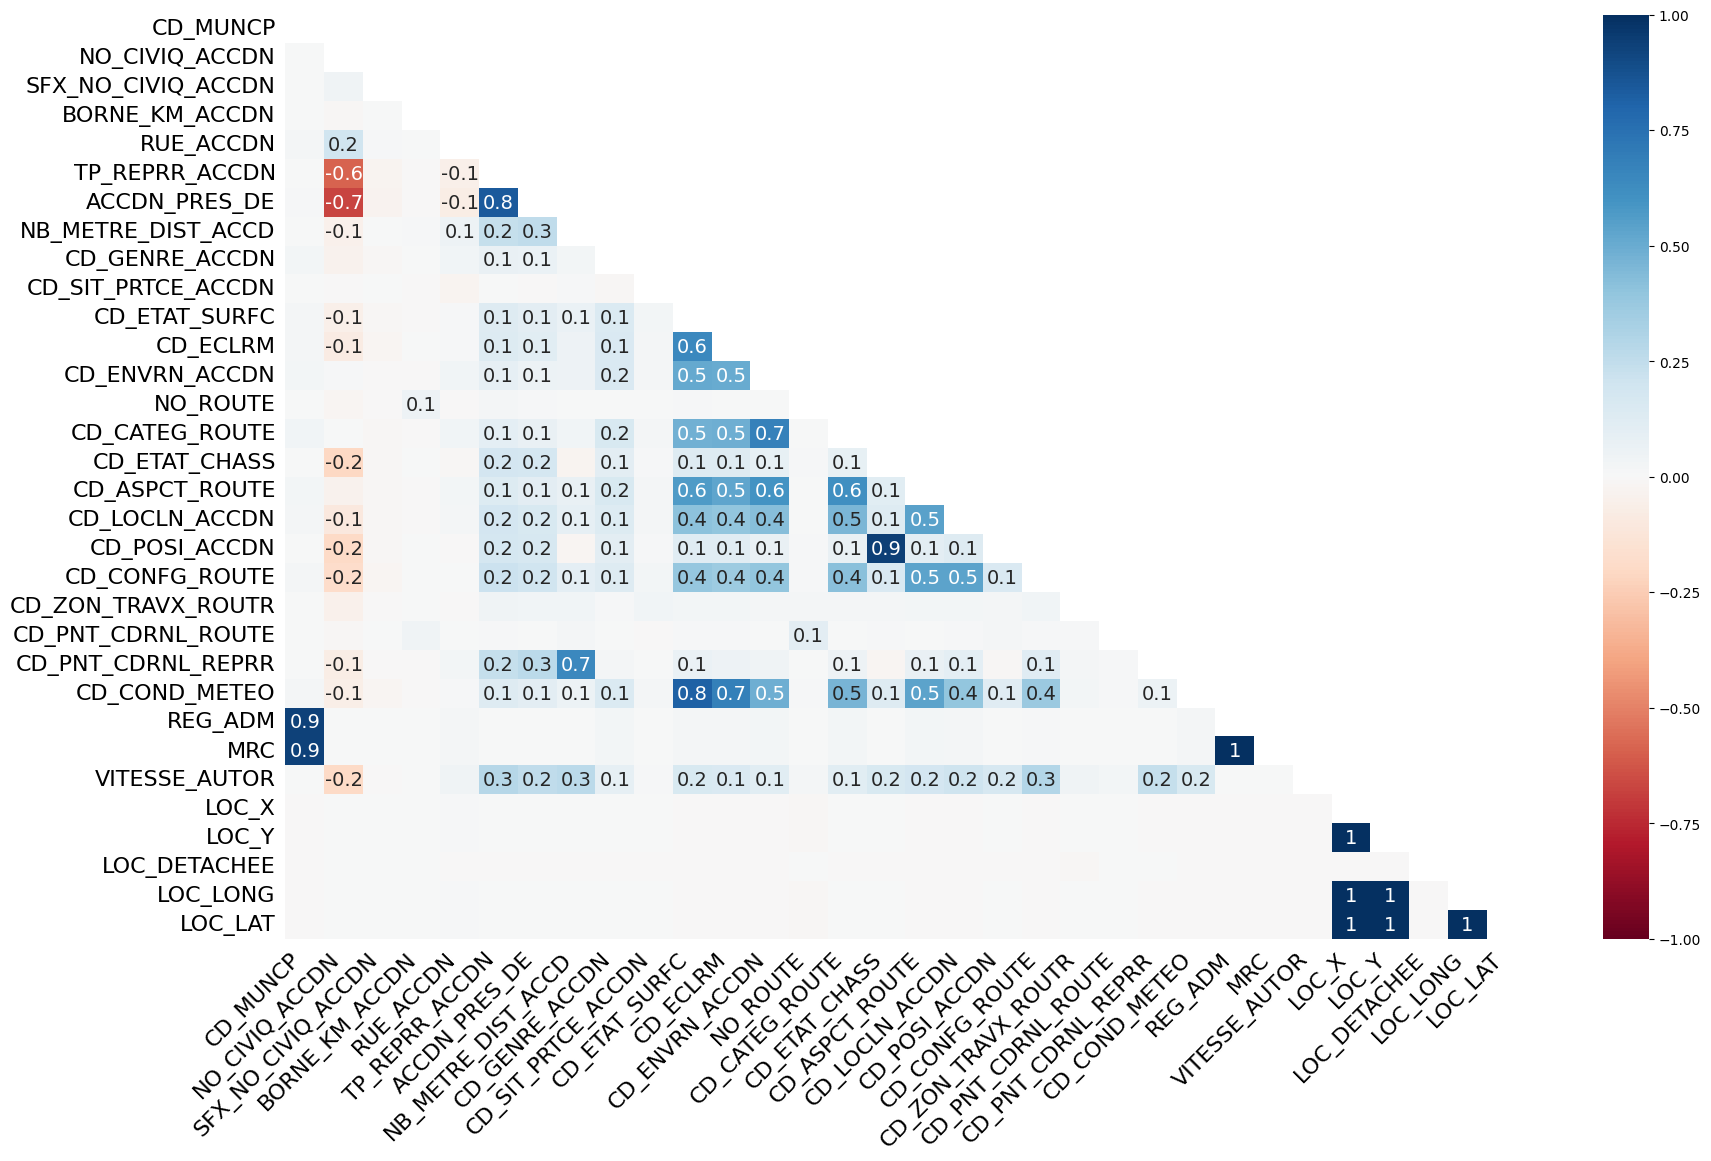

In [ ]:
msno.heatmap(df)
plt.show()

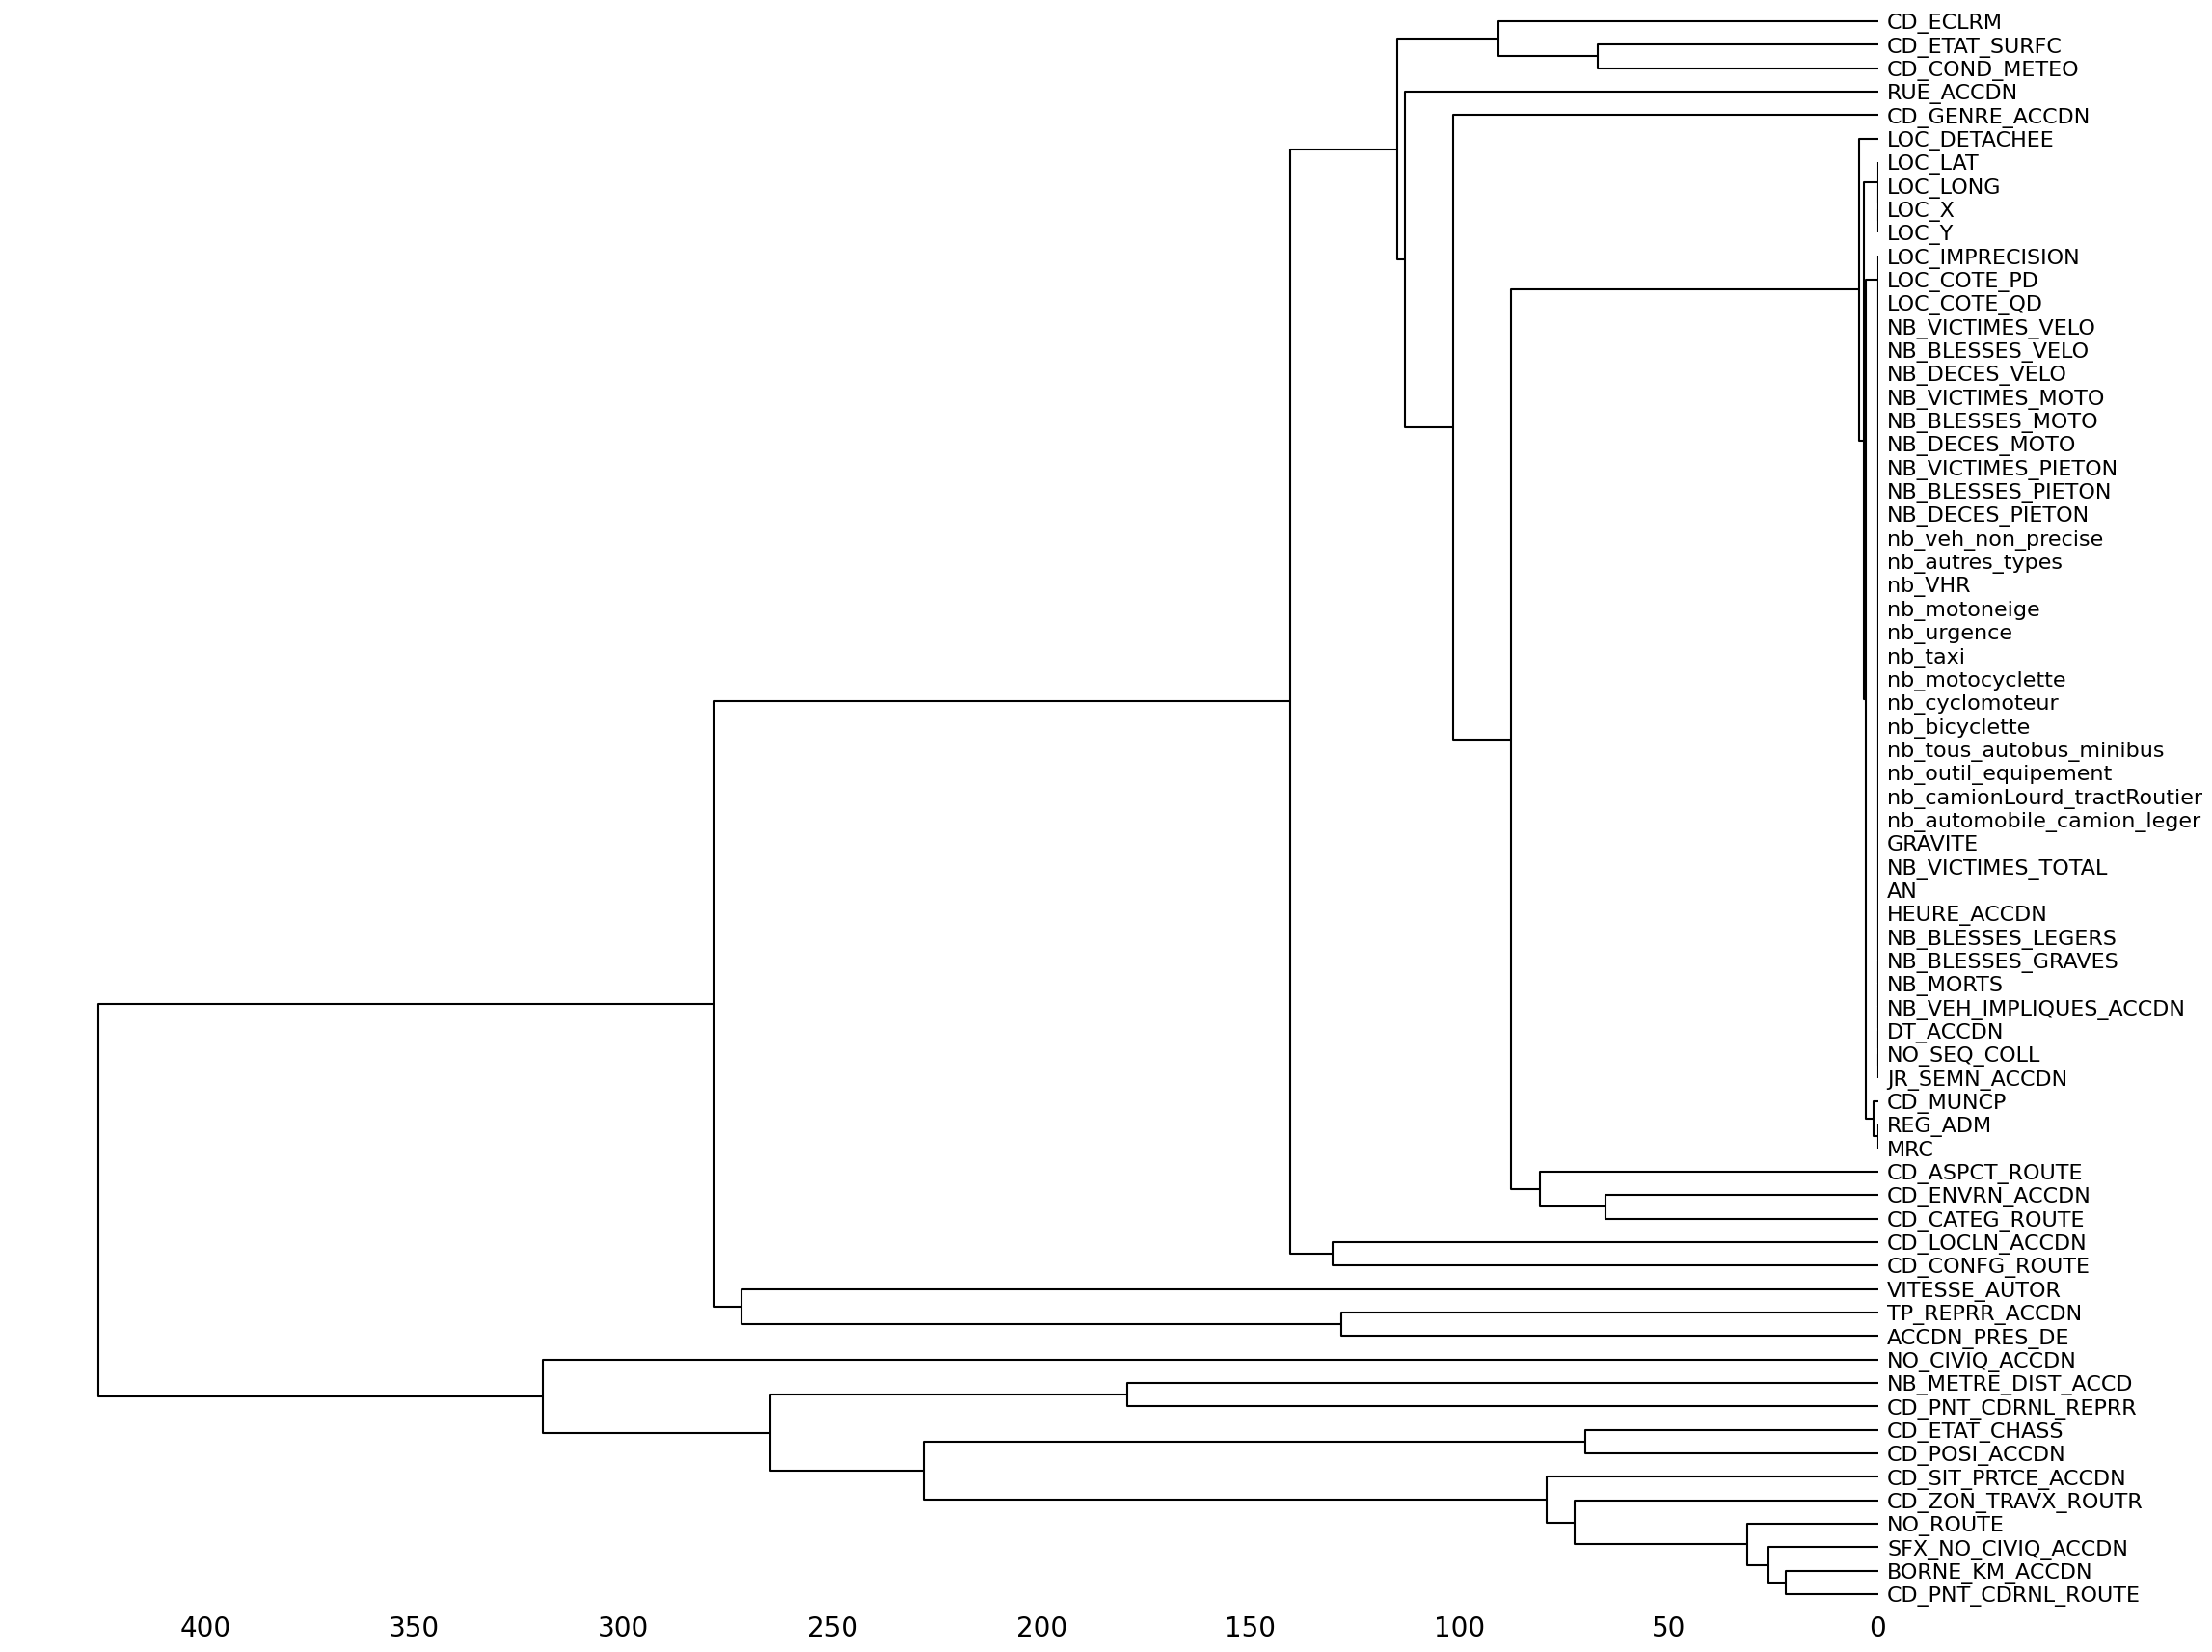

In [ ]:
msno.dendrogram(df)
plt.show()